In [23]:
from Read.readfile.csvio import pd, read_csv_file, write_csv_file
import matplotlib.pyplot as plt

df = read_csv_file("bd-dec22-births-deaths-by-region.csv", encoding="cp1252")

print(df.to_string())

    Period Birth_Death                    Region  Count
0   2005.0      Births          Northland region   2067
1      NaN      Births           Auckland region  20745
2   2005.0      Births            Waikato region   5667
3   2005.0      Births      Bay of Plenty region    NaN
4   2005.0      Births           Gisborne region    NaN
5   2005.0      Births        Hawke's Bay region   2115
6   2005.0      Births           Taranaki region   1410
7   2005.0      Births  Manawatu-Wanganui region   3093
8   2005.0      Births         Wellington region   6225
9   2005.0      Births             Tasman region    513
10  2005.0      Births             Nelson region    519
11     NaN         NaN                       NaN       
12  2005.0      Births        Marlborough region    471
13  2005.0      Births         West Coast region    336
14  2005.0      Births         Canterbury region   6603
15  2005.0      Births              Otago region   2151
16  2005.0      Births          Southland region

In [24]:
print(df.columns)

Index(['Period', 'Birth_Death', 'Region', 'Count'], dtype='object')


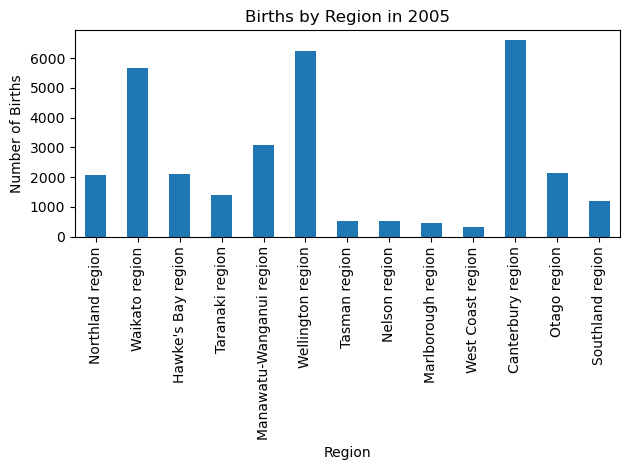

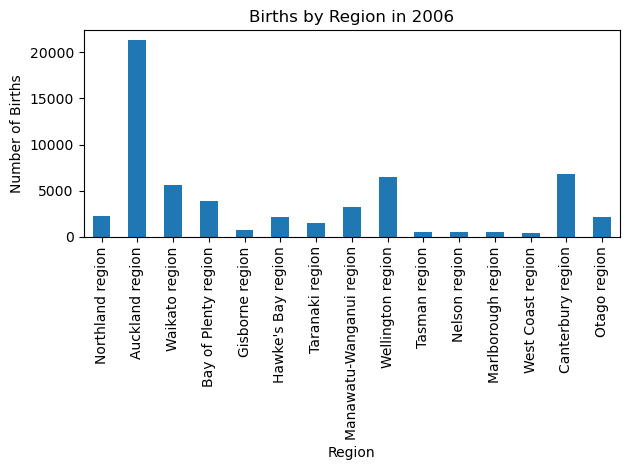

In [34]:
# we "clean" our data by dropping the blank values we added manually to the dataset so it doesn't interfere with the "clean" data
df_clean = df.dropna(subset=["Period", "Birth_Death", "Region", "Count"]).copy()
df_clean["Count"] = pd.to_numeric(df_clean["Count"], errors="coerce")

# we filter for births so we dont mix births and deaths. we also filter the total number of births so the graphs become more readable.
births_filtered = df_clean[df_clean["Birth_Death"] == "Births"]

births_filtered = births_filtered[births_filtered["Region"] != "New Zealand"]

# Here we plot the data for the two years in the dataset
for year in [2005, 2006]:
    year_data = births_filtered[births_filtered["Period"] == year].set_index("Region")
    year_data["Count"].plot(kind="bar", legend=False)
    plt.title(f"Births by Region in {year}")
    plt.ylabel("Number of Births")
    plt.xlabel("Region")
    plt.tight_layout()
    plt.show()

In [35]:
print("Original rows:", len(df))
print("After dropping blanks:", len(df_clean))
print("After filtering births:", len(births_filtered))
#Im using these prints to chek if my filters for both blanks and births are wokring.

Original rows: 56
After dropping blanks: 45
After filtering births: 28
